# Read the file 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [24]:
df = pd.read_csv('base_table_final.csv')
df.dtypes

Unnamed: 0              int64
Timestamp               int64
Journey_Pattern_ID     object
Date                   object
Vehicle_Journey_ID      int64
Lon_WGS84             float64
Lat_WGS84             float64
Delay                   int64
Stop_ID                 int64
At_Stop                 int64
Distance_Terminal       int64
datetime               object
day_of_week            object
Trip_Time               int64
City_Centre             int64
midweek                 int64
hour                    int64
time_bin               object
wind                  float64
rain                  float64
cloud                 float64
temp                  float64
dtype: object

In [25]:
df.head()

,Unnamed: 0,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,...,day_of_week,Trip_Time,City_Centre,midweek,hour,time_bin,wind,rain,cloud,temp
0,0,1352160000,00150001,2012-11-05,5826,-6.258584,53.340099,-361,4870,0,...,Tuesday,0,1,1,0,early_am,9.0,0.0,2.0,5.12
1,1,1352160000,046A1002,2012-11-05,7267,-6.259093,53.345425,-1101,794,0,...,Tuesday,0,1,1,0,early_am,9.0,0.0,2.0,5.12
2,2,1352160000,00140001,2012-11-05,6206,-6.257329,53.287521,-126,1047,0,...,Tuesday,0,0,1,0,early_am,9.0,0.0,2.0,5.12
3,3,1352160002,041B0002,2012-11-05,61,-6.264167,53.453217,-623,3874,1,...,Tuesday,0,0,1,0,early_am,9.0,0.0,2.0,5.12
4,4,1352160002,039A1002,2012-11-05,3795,-6.262447,53.346767,-532,1479,0,...,Tuesday,0,1,1,0,early_am,9.0,0.0,2.0,5.12


In [26]:
df.drop(df.columns[[0,5,6]], axis=1, inplace=True)
df.head(3)

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time,City_Centre,midweek,hour,time_bin,wind,rain,cloud,temp
0,1352160000,00150001,2012-11-05,5826,-361,4870,0,22189,2012-11-06 00:00:00,Tuesday,0,1,1,0,early_am,9.0,0.0,2.0,5.12
1,1352160000,046A1002,2012-11-05,7267,-1101,794,0,14742,2012-11-06 00:00:00,Tuesday,0,1,1,0,early_am,9.0,0.0,2.0,5.12
2,1352160000,00140001,2012-11-05,6206,-126,1047,0,16908,2012-11-06 00:00:00,Tuesday,0,0,1,0,early_am,9.0,0.0,2.0,5.12


In [27]:
df.shape

(3042017, 19)

In [28]:
df_error=df[df['Trip_Time']==0]

In [30]:
df_error.shape

(44710, 19)

In [34]:
df_error

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time,City_Centre,midweek,hour,time_bin,wind,rain,cloud,temp
0,1352160000,00150001,2012-11-05,5826,-361,4870,0,22189,2012-11-06 00:00:00,Tuesday,0,1,1,0,early_am,9.00,0.0,2.0,5.12
1,1352160000,046A1002,2012-11-05,7267,-1101,794,0,14742,2012-11-06 00:00:00,Tuesday,0,1,1,0,early_am,9.00,0.0,2.0,5.12
2,1352160000,00140001,2012-11-05,6206,-126,1047,0,16908,2012-11-06 00:00:00,Tuesday,0,0,1,0,early_am,9.00,0.0,2.0,5.12
3,1352160002,041B0002,2012-11-05,61,-623,3874,1,21507,2012-11-06 00:00:02,Tuesday,0,0,1,0,early_am,9.00,0.0,2.0,5.12
4,1352160002,039A1002,2012-11-05,3795,-532,1479,0,19970,2012-11-06 00:00:02,Tuesday,0,1,1,0,early_am,9.00,0.0,2.0,5.12
5,1352160002,00650001,2012-11-05,4004,-287,7283,0,26300,2012-11-06 00:00:02,Tuesday,0,0,1,0,early_am,9.00,0.0,2.0,5.12
6,1352160002,040D1001,2012-11-05,2466,-488,52,0,17201,2012-11-06 00:00:02,Tuesday,0,1,1,0,early_am,9.00,0.0,2.0,5.12
7,1352160002,00111002,2012-11-05,5241,-536,320,0,10697,2012-11-06 00:00:02,Tuesday,0,1,1,0,early_am,9.00,0.0,2.0,5.12
8,1352160002,00311001,2012-11-05,2819,-386,613,0,15034,2012-11-06 00:00:02,Tuesday,0,1,1,0,early_am,9.00,0.0,2.0,5.12
9,1352160002,00270001,2012-11-05,4976,0,2355,1,28701,2012-11-06 00:00:02,Tuesday,0,0,1,0,early_am,9.00,0.0,2.0,5.12


In [32]:
df_error=df_error[df['Distance_Terminal']>0]

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [33]:
df_error.shape

(43144, 19)

# Get one Journey_Pattern_ID

In [6]:
df=df.loc[df['Journey_Pattern_ID']=='041B0002']
df.shape

(1549, 19)

In [7]:
df.reset_index(drop=True, inplace=True)

In [22]:
df_error=df.loc[df['Trip_Time']==0]

In [23]:
df_error.shape

(29, 19)

In [19]:
df_error=df_error.loc[df_error['Distance_Terminal']>0]

In [20]:
df_error

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time,City_Centre,midweek,hour,time_bin,wind,rain,cloud,temp
0,1352160002,041B0002,2012-11-05,61,-623,3874,1,21507,2012-11-06 00:00:02,Tuesday,0,0,1,0,early_am,9.00,0.00,2.00,5.12
1,1352201449,041B0002,2012-11-06,51,41,288,0,10,2012-11-06 11:30:49,Tuesday,0,1,1,11,am,16.25,0.00,6.88,7.55
52,1352218951,041B0002,2012-11-06,203,0,288,1,10,2012-11-06 16:22:31,Tuesday,0,1,1,16,pm,17.62,0.00,6.38,9.19
116,1352226305,041B0002,2012-11-06,165,0,288,1,10,2012-11-06 18:25:05,Tuesday,0,1,1,18,pm,17.62,0.00,6.38,9.19
170,1352243666,041B0002,2012-11-06,61,0,288,1,10,2012-11-06 23:14:26,Tuesday,0,1,1,23,late_pm,16.33,0.00,7.67,7.97
219,1352287766,041B0002,2012-11-07,51,0,288,1,10,2012-11-07 11:29:26,Wednesday,0,1,1,11,am,15.75,0.00,6.75,9.22
272,1352305269,041B0002,2012-11-07,203,0,288,1,10,2012-11-07 16:21:09,Wednesday,0,1,1,16,pm,17.12,0.00,7.00,10.19
335,1352312711,041B0002,2012-11-07,165,0,288,1,10,2012-11-07 18:25:11,Wednesday,0,1,1,18,pm,17.12,0.00,7.00,10.19
393,1352329811,041B0002,2012-11-07,61,-53,288,1,10,2012-11-07 23:10:11,Wednesday,0,1,1,23,late_pm,17.00,0.00,7.00,8.67
446,1352374180,041B0002,2012-11-08,51,0,288,1,10,2012-11-08 11:29:40,Thursday,0,1,1,11,am,13.12,0.00,3.62,7.81


In [21]:
df_error.shape

(29, 19)

In [16]:
df['City_Centre_number']=df.groupby(['Vehicle_Journey_ID','Journey_Pattern_ID','Date'])['City_Centre'].cumsum()
df.tail()

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time,City_Centre,midweek,hour,time_bin,wind,rain,cloud,temp,City_Centre_number
1544,1352763914,041B0002,2012-11-12,61,-1104,7134,0,16470,2012-11-12 23:45:14,Monday,2111,0,0,23,late_pm,9.33,0.0,7.0,12.47,10
1545,1352763935,041B0002,2012-11-12,61,-1123,3867,0,17787,2012-11-12 23:45:35,Monday,2132,0,0,23,late_pm,9.33,0.0,7.0,12.47,10
1546,1352764094,041B0002,2012-11-12,61,-1140,7135,0,19257,2012-11-12 23:48:14,Monday,2291,0,0,23,late_pm,9.33,0.0,7.0,12.47,10
1547,1352764176,041B0002,2012-11-12,61,-1140,7136,0,20002,2012-11-12 23:49:36,Monday,2373,0,0,23,late_pm,9.33,0.0,7.0,12.47,10
1548,1352764315,041B0002,2012-11-12,61,-1029,3874,1,21507,2012-11-12 23:51:55,Monday,2512,0,0,23,late_pm,9.33,0.0,7.0,12.47,10


# Train Data set with statsmodels

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])
X

NameError: name 'X' is not defined

In [17]:
feature_cols = ['Distance_Terminal','midweek','hour']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Index(['Distance_Terminal', 'midweek', 'hour'], dtype='object')

In [20]:
import statsmodels.formula.api as sm
df_linear = pd.concat([X, y], axis=1)
lm = sm.ols(formula = "Trip_Time ~ Distance_Terminal+hour+midweek", data=df_linear).fit()

In [21]:
lm.params

Intercept            511.744694
Distance_Terminal      0.149778
hour                 -11.370223
midweek              191.049277
dtype: float64

In [22]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Trip_Time   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     1924.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:20:59   Log-Likelihood:                -11728.
No. Observations:                1549   AIC:                         2.346e+04
Df Residuals:                    1545   BIC:                         2.349e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           511.7447     55.165      9.277      0.000     403.539     619.950
Distance_Terminal     0.1498      0.002     75.582      0.000       0.146       0.154
hour                -11.3702      2.930     -3.880      0.000     -17.118      -5.623
midweek             191.0493     24.291      7.865      0.000     143.403     238.696
==============================================================================
Omnibus:                      178.345   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1116.048
Skew:                           0.329   Prob(JB):                    4.50e-243
Kurtosis:                       7.106   Cond. No.                     4.85e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
lm_predictions = lm.predict(X)

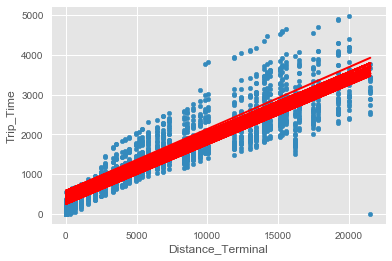

In [52]:
df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time')
plt.plot(X['Distance_Terminal'], lm_predictions, c='red', linewidth=2)

#plt.savefig('SM_Linear_Reg.png')

In [25]:
lm.conf_int()

,0,1
Intercept,403.539037,619.950352
Distance_Terminal,0.145891,0.153665
hour,-17.117911,-5.622534
midweek,143.402762,238.695792


In [26]:
# MSE: Mean Squared Error
mse=((df_linear.Trip_Time-lm.predict(df_linear))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 220765.830818


In [27]:
# MAE:  Mean Absolute mean 
mae = abs(df_linear.Trip_Time-lm.predict(df_linear)).mean()
print("Mean Absolute mean ",mae)

Mean Absolute mean  353.096816961


# Use an sklearn model to train data set 

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [29]:
feature_cols = ['Distance_Terminal','midweek','hour']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

Index(['Distance_Terminal', 'midweek', 'hour'], dtype='object')

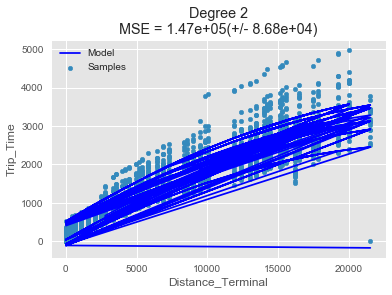

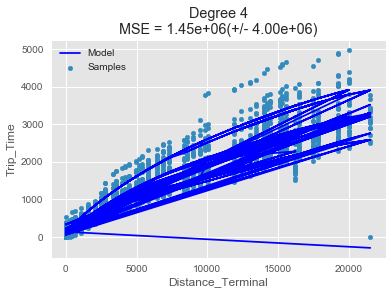

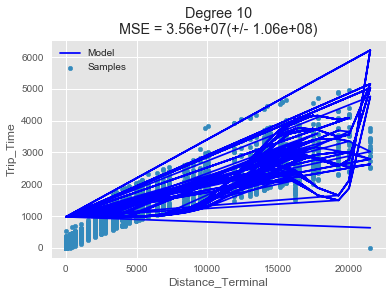

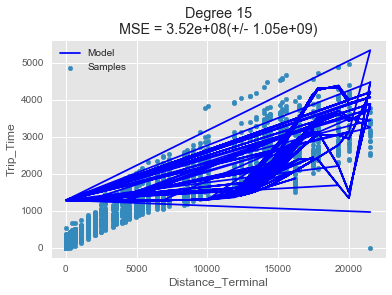

In [31]:
degrees = [2,4,10,15]

#plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)
    scores = cross_val_score(pipeline, X, y,
                             scoring="neg_mean_squared_error", cv=10)

    df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time',label="Samples")
    plt.plot(X['Distance_Terminal'], pipeline.predict(X), c='Blue', label="Model")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
    plt.show()

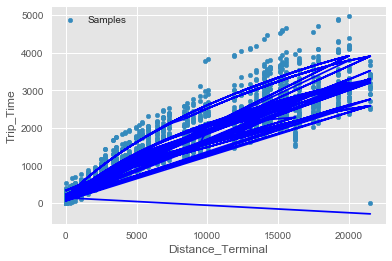

In [45]:
polynomial_features = PolynomialFeatures(degree=4,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X, y)

df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time',label="Samples")
plt.plot(X['Distance_Terminal'], pipeline.predict(X), c='Blue', label="Model")

plt.savefig('Linear_Reg_Poly.png')

In [46]:
pipeline.named_steps['linear_regression'].get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [47]:
# MSE: Mean Squared Error
mse=((y-pipeline.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 86957.1436619


In [48]:
# MAE:  Mean Absolute Error 
mae = abs(y-pipeline.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  210.532592766


In [49]:
pipeline.get_params()

{'linear_regression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': True,
 'linear_regression__n_jobs': 1,
 'linear_regression__normalize': False,
 'polynomial_features': PolynomialFeatures(degree=4, include_bias=False, interaction_only=False),
 'polynomial_features__degree': 4,
 'polynomial_features__include_bias': False,
 'polynomial_features__interaction_only': False,
 'steps': [('polynomial_features',
   PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)),
  ('linear_regression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]}

In [50]:
lm_sk_predictions = pipeline.predict(X)

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


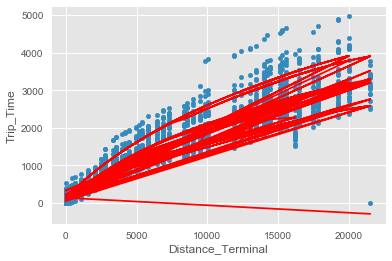

In [53]:
df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time')
plt.plot(X['Distance_Terminal'], lm_sk_predictions, c='red')
plt.legend(loc="best")
plt.savefig('SM_Linear_Reg.png')

# Train data set with SVM 

In [60]:
#Import SVM and assign to a model 
from sklearn import svm
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
clf = svm.SVR()

In [61]:
# Prepare the descriptive features
X = pd.concat([df[['Distance_Terminal','midweek','hour']]], axis=1)
y = df.Trip_Time 

print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       Distance_Terminal  midweek  hour
0                 21507        1     0
1                    10        1    11
2                   305        1    11
3                   471        1    11
4                   683        1    11
5                  1101        1    11
6                  1590        1    11
7                  2058        1    11
8                  2493        1    11
9                  2789        1    11
10                 2789        1    11
11                 3327        1    11
12                 3327        1    11
13                 3580        1    11
14                 3966        1    11
15                 4179        1    11
16                 4462        1    11
17                 4981        1    11
18                 4981        1    11
19                 5159        1    11
20                 5159        1    11
21                 5407        1    11
22                 5794        1    11
23                 6472        1    11
24

In [62]:
# Train the model 
%time clf.fit(X, y)

CPU times: user 86 ms, sys: 4.93 ms, total: 91 ms
Wall time: 91.6 ms


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
# Get the predicetion 
y_rbf = clf.predict(X)
y_rbf

array([ 1610.16798605,  1601.29225235,  1603.29297365, ...,  1619.78641286,
        1615.34134814,  1615.33786052])

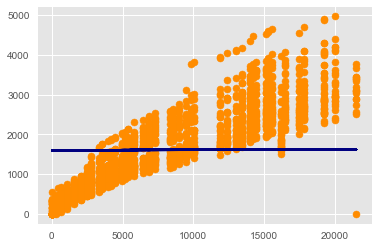

In [64]:
# Get the predicetion 
y_rbf = clf.predict(X)
y_rbf
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')
plt.plot(X['Distance_Terminal'], y_rbf, color='navy', label='RBF model')
plt.savefig('SVM_result.png')

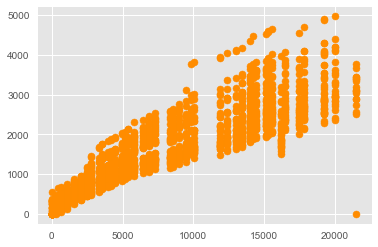

In [65]:
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')

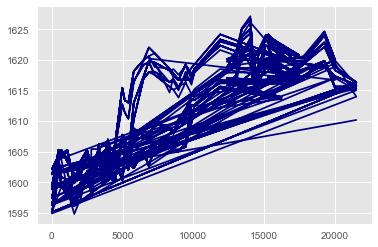

In [66]:
plt.plot(X['Distance_Terminal'], y_rbf, color='navy', label='RBF model')
plt.show()

# Train Data with Neural network model 

In [67]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
# Import MLPRegressor from sklearn.neural_network 
from sklearn.neural_network import MLPRegressor 
mlpreg=MLPRegressor()

In [69]:
# Prepare the descriptive features
X = pd.concat([df[['Distance_Terminal','midweek','hour']]], axis=1)
y = df.Trip_Time 

print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       Distance_Terminal  midweek  hour
0                 21507        1     0
1                    10        1    11
2                   305        1    11
3                   471        1    11
4                   683        1    11
5                  1101        1    11
6                  1590        1    11
7                  2058        1    11
8                  2493        1    11
9                  2789        1    11
10                 2789        1    11
11                 3327        1    11
12                 3327        1    11
13                 3580        1    11
14                 3966        1    11
15                 4179        1    11
16                 4462        1    11
17                 4981        1    11
18                 4981        1    11
19                 5159        1    11
20                 5159        1    11
21                 5407        1    11
22                 5794        1    11
23                 6472        1    11
24

In [70]:
# Train the data with MLP Regressor 
mlpreg.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

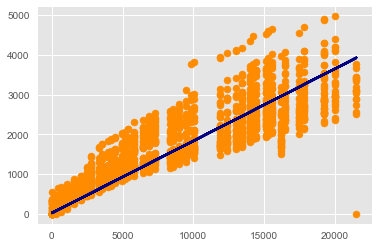

In [71]:
# Get the predicetion 
y_mlpreg = mlpreg.predict(X)
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')
plt.plot(X['Distance_Terminal'], y_mlpreg, color='navy', label='ANN model')
plt.savefig('ANN_result.png')

In [72]:
# MSE: Mean Squared Error   
# Mean Squared Error of linear: 131771.970239 
mse=((y-mlpreg.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 289913.020154


In [73]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y-mlpreg.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  412.871595243
